In [1]:
data_dir='./data/voice/processed/'
import os
from scipy.io.wavfile import read
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
from PIL import Image
import scipy.misc
import cv2
import librosa
from tqdm import tqdm
import numpy as np
import librosa
import librosa.display
import os
import glob
import scipy
import matplotlib.pyplot as plt
import librosa
import IPython
import cv2
from IPython.display import Audio
import soundfile as sf
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tqdm import tqdm
cmap = plt.get_cmap('inferno')
import python_speech_features as mfcc
data=[]
label=[]
file = './data/voice/final_val.csv'
df = pd.read_csv(file)
df = df.drop(['Unnamed: 0'],axis=1)
df = df.drop_duplicates('ID')
df

,ID,Age,Gender,Voice Handicap Index (VHI) Score,Reflux Symptom Index (RSI) Score,Smoker,Alcohol consumption,Amount of water's litres drink every day,Tomatoes,Coffee,Chocolate,Soft cheese,Citrus fruits,Diagnosis
0,voice001,32,1,15,5,0,1,1,1,3,0,1,1,1
1,voice002,55,1,17,12,1,1,0,1,1,1,3,3,0
2,voice003,34,1,42,26,0,1,1,1,3,1,3,0,1
3,voice004,28,0,20,9,1,1,1,1,4,1,3,1,2
4,voice005,54,0,39,23,0,1,1,1,2,1,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,voice204,59,0,0,7,0,0,2,1,1,1,0,0,0
204,voice205,30,0,62,19,1,1,1,1,4,3,1,1,1
205,voice206,22,0,0,6,0,0,2,1,1,1,1,0,0
206,voice207,30,0,0,26,0,0,2,1,2,1,1,1,0


In [3]:
clean_data = np.load('clean_data.npy',allow_pickle=True)
clean_labels = np.load('clean_labels.npy')
noise_added = np.load('noise_added.npy')
clean_pad = np.load('clean_pad.npy')
denoised = np.load('denoised_audio.npy')

In [3]:
clean_pad[0].shape


(3872,)

In [4]:
# X_train.shape, X_test.shape,y_train.shape, y_test.shape 
stft_denoised=[]
for i in tqdm(denoised):
    stft_denoised.append(librosa.stft(np.reshape(i,(3872)),n_fft=2046))
stft_denoised = np.array(stft_denoised)
stft_denoised.shape

100%|████████████████████████████████████████████████████████████████████████████| 2060/2060 [00:02<00:00, 1029.15it/s]


(2060, 1024, 8)

In [6]:
stft_denoised[1].shape

(1024, 8)

C:\Users\abdul\AppData\Roaming\Python\Python37\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


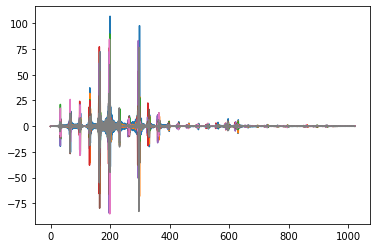

C:\Users\abdul\AppData\Roaming\Python\Python37\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


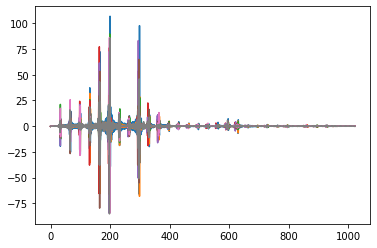

C:\Users\abdul\AppData\Roaming\Python\Python37\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


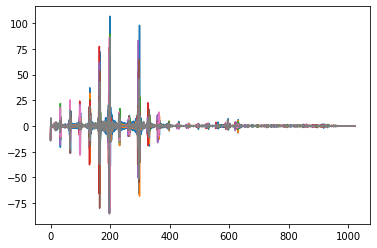

C:\Users\abdul\AppData\Roaming\Python\Python37\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


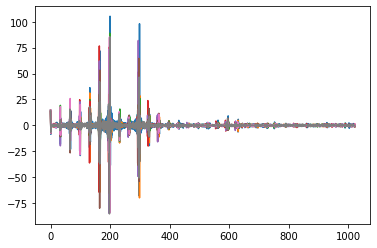

In [104]:
den = stft_denoised[1]
# print(den.shape)

plt.plot(librosa.stft(clean_data[1],n_fft=2046))
plt.show()

plt.plot(librosa.stft(clean_pad[1],n_fft=2046))
plt.show()

plt.plot(librosa.stft(noise_added[1],n_fft=2046))
plt.show()

plt.plot(den)
plt.show()

# Audio(den, rate=8000)

In [51]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
output_matrix = to_categorical(clean_labels, num_classes = 4)
X_train, X_test,y_train, y_test = train_test_split(stft_denoised,output_matrix ,
                                       random_state=98, 
                                       test_size=0.2, 
                                       shuffle=True)

In [7]:
model = tf.keras.models.load_model('final_voice_model_new.h5')

In [14]:
X_train.shape

(1648, 1024, 8)

<tf.Tensor 'dense_2/Softmax:0' shape=(None, 4) dtype=float32>

In [52]:
y_true = np.argmax(y_test,axis =-1)
y_pred = np.argmax(model.predict(X_test),axis =-1)
target_names = ['healthy', 'hyperkinetic dysphonia', 'hypokinetic dysphonia','reflux laryngitis']

                        precision    recall  f1-score   support

               healthy       0.97      0.96      0.96       123
hyperkinetic dysphonia       0.98      0.97      0.97       152
 hypokinetic dysphonia       0.92      0.94      0.93        70
     reflux laryngitis       0.97      0.99      0.98        67

              accuracy                           0.96       412
             macro avg       0.96      0.96      0.96       412
          weighted avg       0.96      0.96      0.96       412

[[118   1   2   2]
 [  1 147   4   0]
 [  2   2  66   0]
 [  1   0   0  66]]


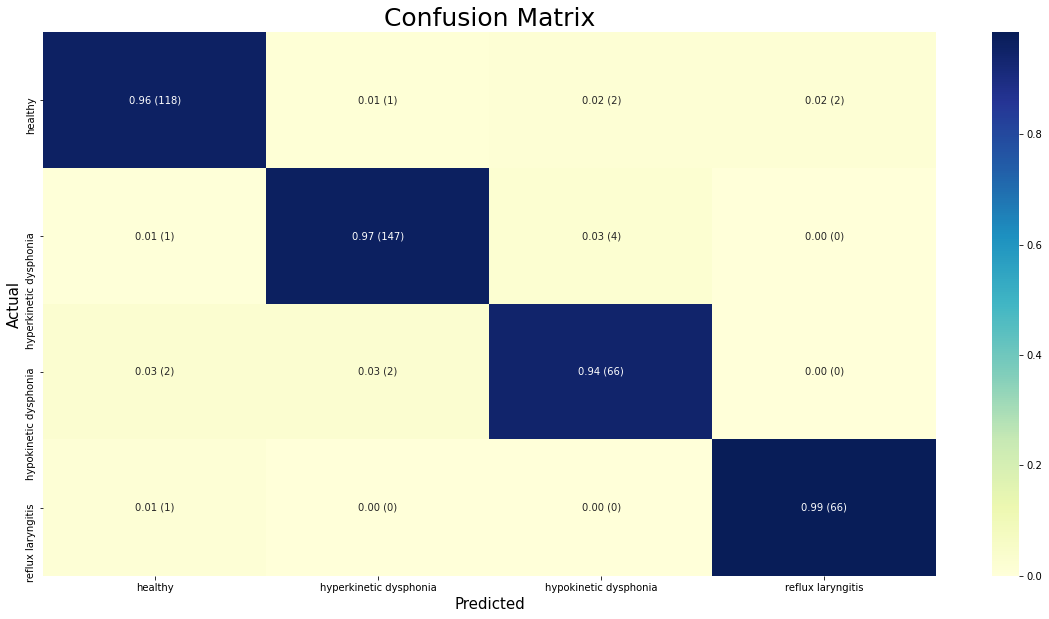

In [53]:
import sklearn
import seaborn as sns
# from s
print(sklearn.metrics.classification_report(y_true, y_pred,labels=[0,1,2,3], target_names=target_names))
print(sklearn.metrics.confusion_matrix(y_true, y_pred,labels=[0,1,2,3]))


def plot_conf_mat(Ground_Truth_Labels, Predictions):
  confusion_matrix_raw = sklearn.metrics.confusion_matrix(Ground_Truth_Labels, Predictions, normalize=None)
  confusion_matrix_norm = sklearn.metrics.confusion_matrix(Ground_Truth_Labels, Predictions, normalize='true')
  shape = confusion_matrix_raw.shape
  data = np.asarray(confusion_matrix_raw, dtype=int)
  text = np.asarray(confusion_matrix_norm, dtype=float)
  annots = (np.asarray(["{0:.2f} ({1:.0f})".format(text, data) for text, data in zip(text.flatten(), data.flatten())])).reshape(shape[0],shape[1])
  fig = plt.figure(figsize=(20, 10))
  sns.heatmap(confusion_matrix_norm, cmap='YlGnBu', annot=annots, fmt='', xticklabels=target_names, yticklabels=target_names)
  plt.title('Confusion Matrix', fontsize=25)
  plt.xlabel("Predicted", fontsize=15)
  plt.ylabel("Actual", fontsize=15)
#
plot_conf_mat(y_true, y_pred)

In [308]:
samp =np.reshape(X_test[0],(1,1024,8))
expected_output = np.reshape(y_test[0],(1,4))



In [540]:
assert model.layers[-1].activation == tf.keras.activations.softmax

config = model.layers[-1].get_config()
weights = [x.numpy() for x in model.layers[-1].weights]

config['activation'] = tf.keras.activations.linear
config['name'] = 'logits'

new_layer = tf.keras.layers.Dense(**config)(model.layers[-2].output)
new_model = tf.keras.Model(inputs=[model.input], outputs=[new_layer])
new_model.layers[-1].set_weights(weights)

assert new_model.layers[-1].activation == tf.keras.activations.linear
# new_model.summary()

In [323]:
np.mean(predictions)
np.argmax(expected_output,axis=-1)
inputs
# samp
tf.cast(samp,dtype='float32')

<tf.Tensor: shape=(1, 1024, 8), dtype=float32, numpy=
array([[[ 2.2346210e+01,  2.4588657e+01,  2.5718670e+01, ...,
          2.6451729e+01,  2.6181452e+01,  2.3576210e+01],
        [-9.0292215e+00, -1.3485198e+01, -1.3172127e+01, ...,
         -1.4464193e+01, -1.3195973e+01, -1.1443406e+01],
        [-3.6173556e+00,  1.8570855e+00, -9.8619675e-03, ...,
          2.0306942e+00, -5.2197081e-01, -6.9957435e-02],
        ...,
        [-2.4452021e+00, -1.1299615e+00, -1.9326295e-01, ...,
          1.0005809e+00,  4.8197755e-01,  4.8976725e-01],
        [ 3.9917915e+00,  2.4558868e-01,  3.3495404e-02, ...,
         -3.4848073e+00,  3.2470293e+00, -3.5919433e+00],
        [-4.0248489e+00,  1.5224071e+00,  2.5245798e-01, ...,
          5.1436644e+00, -6.6991925e+00,  6.9904432e+00]]], dtype=float32)>

(2060, 3872, 1)

In [457]:


with tf.GradientTape() as tape:
    # cast image to float
    inputs = tf.cast(X_test,dtype='float32')

    # watch the input pixels
    tape.watch(inputs)

    # generate the predictions
    predictions = new_model(inputs)
#     print(predictions,np.argmax(predictions))

    # get the loss
#     print(expected_output, predictions)
    loss = tf.keras.losses.categorical_crossentropy(
        y_test, predictions
    )
#     print(expected_output, predictions,loss)

# get the gradient with respect to the inputs
# K.gradients(K.mean(model.layers[-2].output[0, :], axis=-1), model.layers[-5].layers[-2].output)[0]
gradients = tape.gradient(loss, inputs)
print(tf.reduce_max(tf.abs(inputs)))

print(tf.reduce_max(tf.abs(loss)))
# model.summary()
# gradients
# print(tf.reduce_sum(gradients, axis=None).numpy()) # 0.07137820225818814

gradients
print(tf.reduce_max(tf.abs(gradients)))

tf.Tensor(213.1181, shape=(), dtype=float32)
tf.Tensor(16.118095, shape=(), dtype=float32)
tf.Tensor(0.74349385, shape=(), dtype=float32)


In [514]:
from collections import defaultdict
dic = defaultdict()
for i in range(len(gradients)):
    if (tf.reduce_max(tf.abs(gradients[i])))!=0:
#         if np.argmax(y_test[i],axis=-1)==3:
#         print(np.argmax(y_test[i],axis=-1))
#         print(tf.reduce_max(tf.abs(gradients[i])),y_test[i],i)
        
        dic[np.argmax(y_test[i],axis=-1)] = (gradients[i],i)
#         dic[np.argmax(y_test[i],axis=-1)].append(gradients[i])
        
        
# plt.plot(gradients[i])
# plt.show()

In [511]:
# np.array(dic[i][0]/np.max(dic[i][0])).shape
dic

defaultdict(None, {1: (<tf.Tensor: shape=(1024, 8), dtype=float32, numpy=
              array([[-1.7515875e-08, -1.9274914e-08, -4.1080199e-08, ...,
                      -1.1631172e-08, -5.3649973e-08, -7.1376157e-08],
                     [ 6.0960609e-08,  4.3390802e-10,  1.1033871e-08, ...,
                       4.9125752e-08,  5.9017594e-08,  3.9243346e-09],
                     [ 3.8242838e-08, -7.1468861e-08, -4.8210424e-08, ...,
                       7.9323268e-09, -1.2522406e-07, -1.6887009e-07],
                     ...,
                     [-4.1119728e-13, -3.1150375e-13,  2.8405324e-13, ...,
                      -5.4841044e-13, -2.1875897e-13,  4.9251716e-13],
                     [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
                       0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
                     [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
                       0.0000000e+00,  0.0000000e+00,  0.0000000e+00]], dtype=float32)>,
      

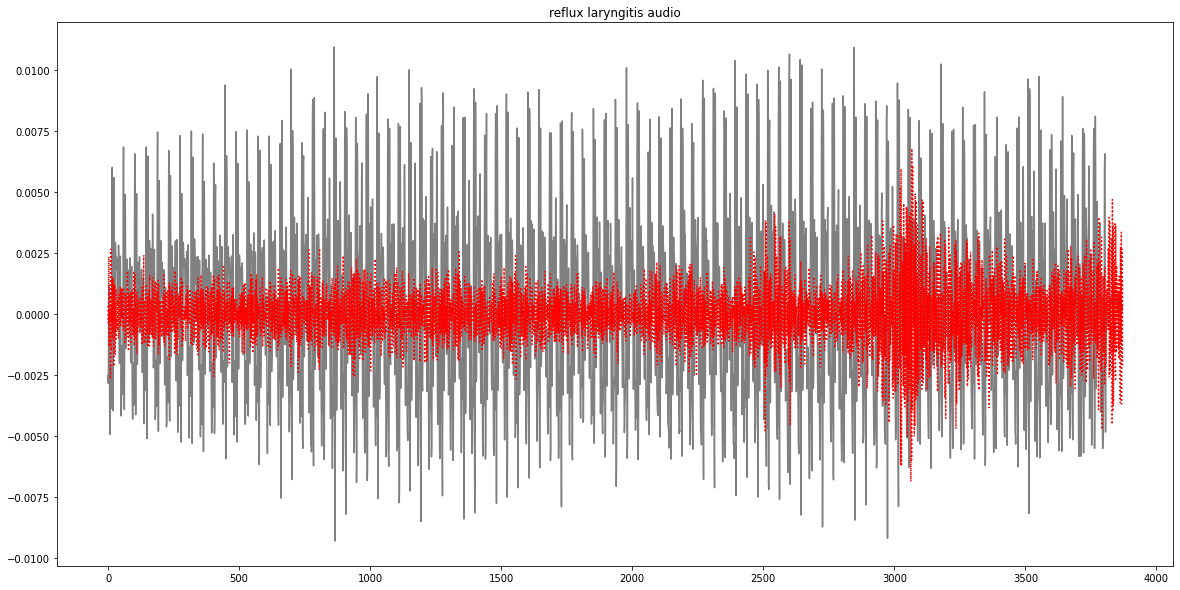

In [516]:

plt.figure(figsize=(20,10))
grad = np.array(dic[i][0]/np.max(dic[i][0]))
aud = np.reshape(X_test[dic[i][1]]/np.max(X_test[dic[i][1]]),(1024,8))                                        
plt.plot(librosa.istft(aud, length=3872),color = 'gray')
plt.plot(librosa.istft(grad,length=3872),color = 'red',ls = 'dotted')
plt.title(target_names[i]+" audio")
plt.show()

C:\Users\abdul\AppData\Roaming\Python\Python37\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


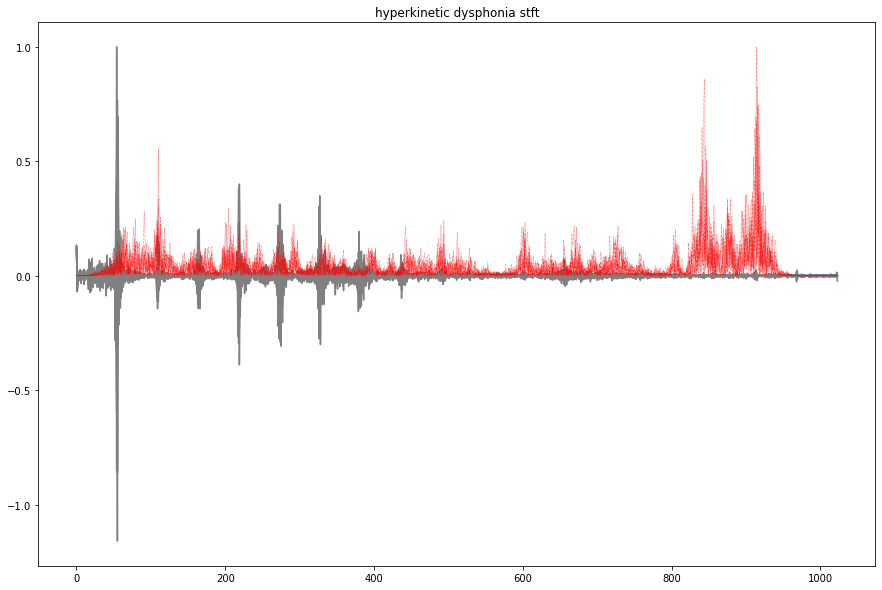

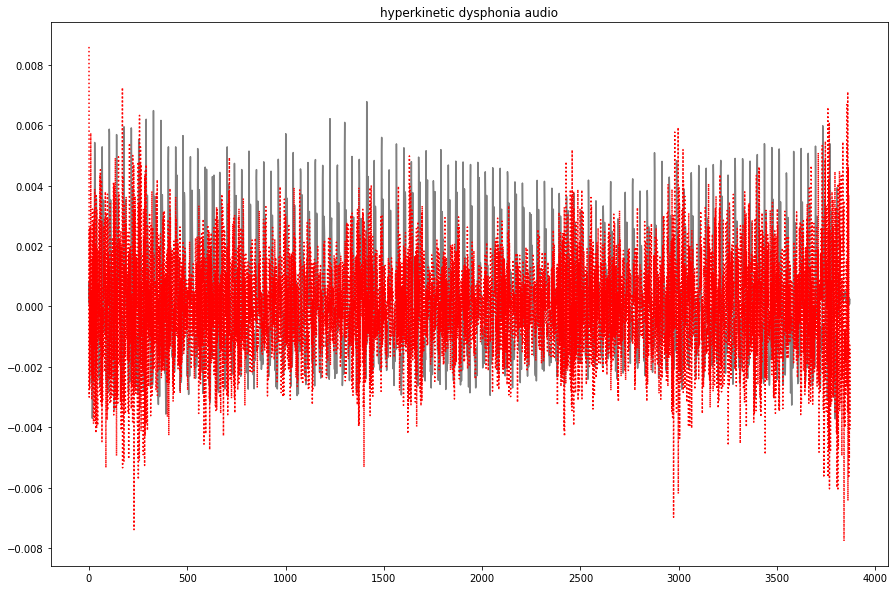

C:\Users\abdul\AppData\Roaming\Python\Python37\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


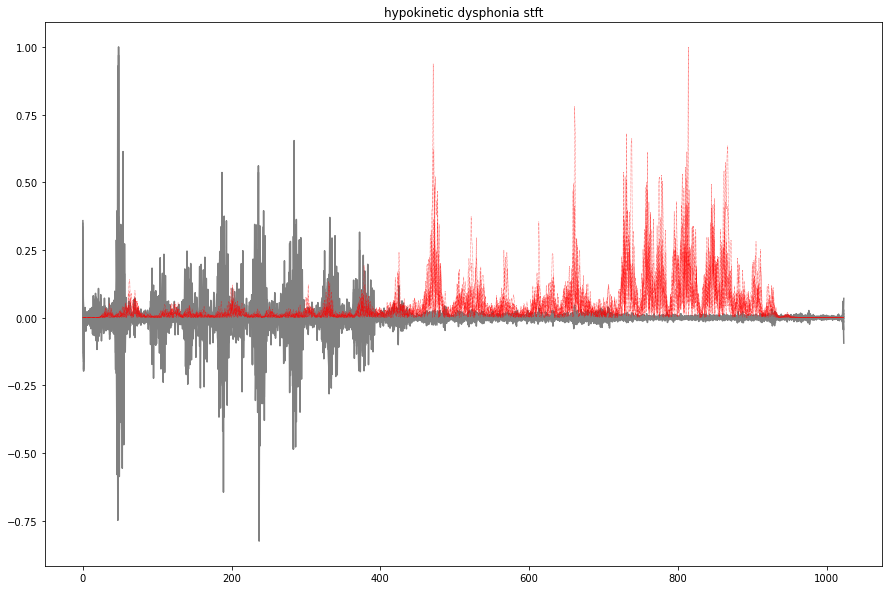

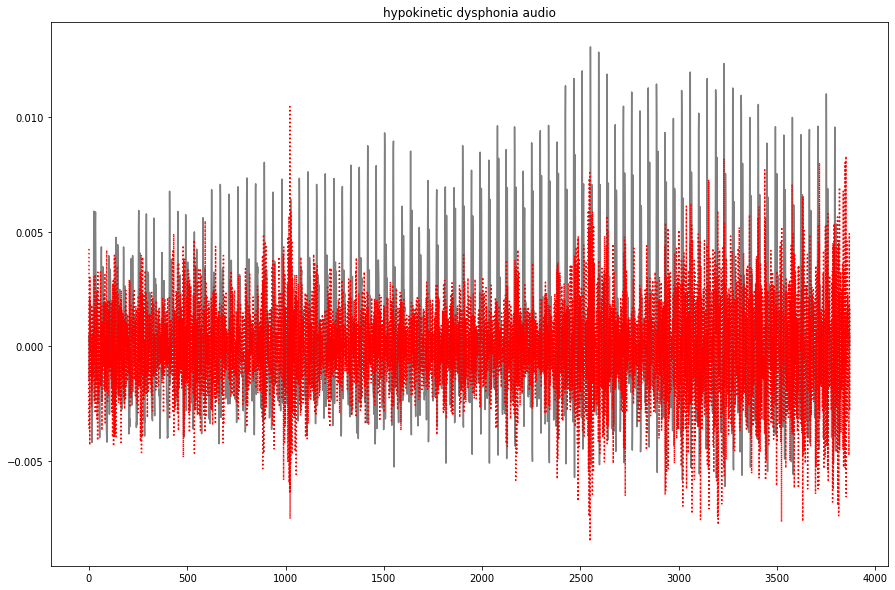

C:\Users\abdul\AppData\Roaming\Python\Python37\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


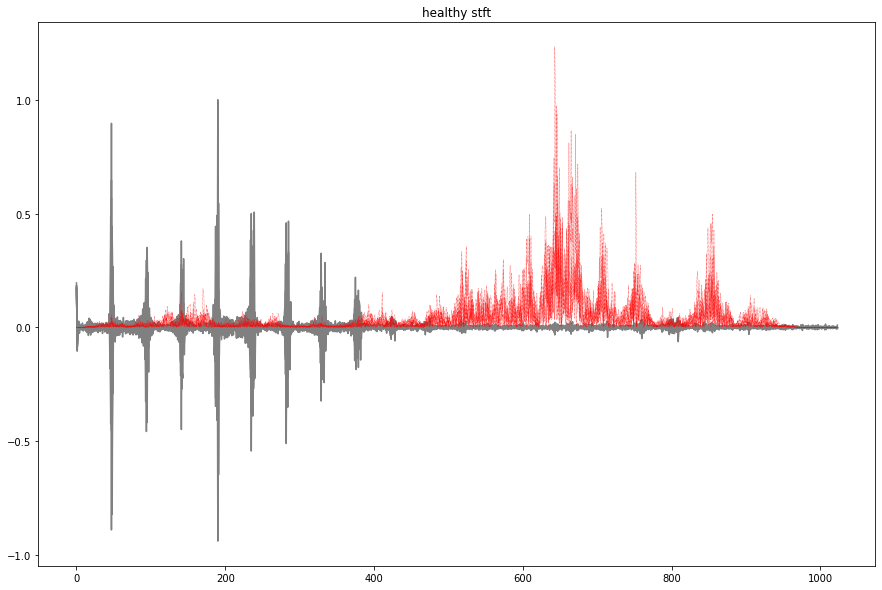

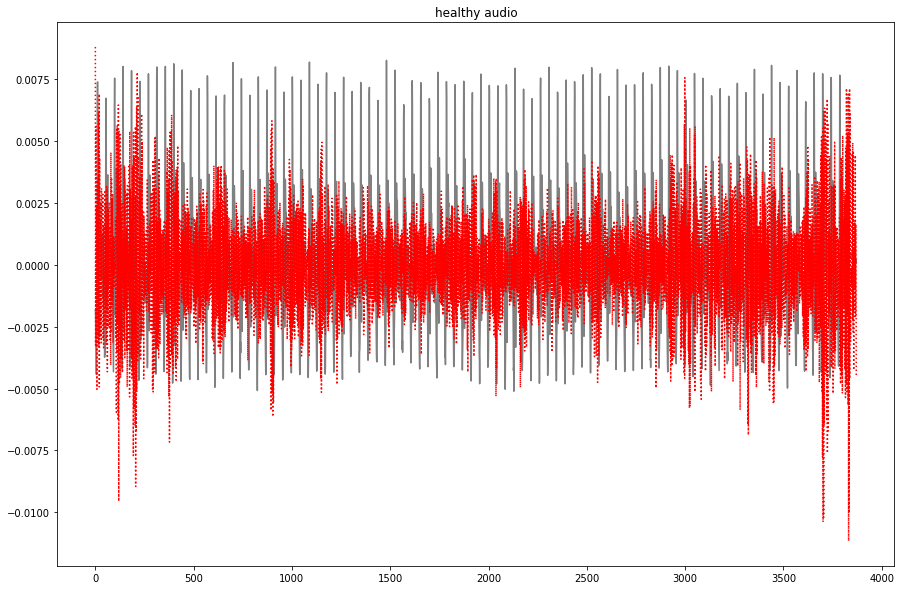

C:\Users\abdul\AppData\Roaming\Python\Python37\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


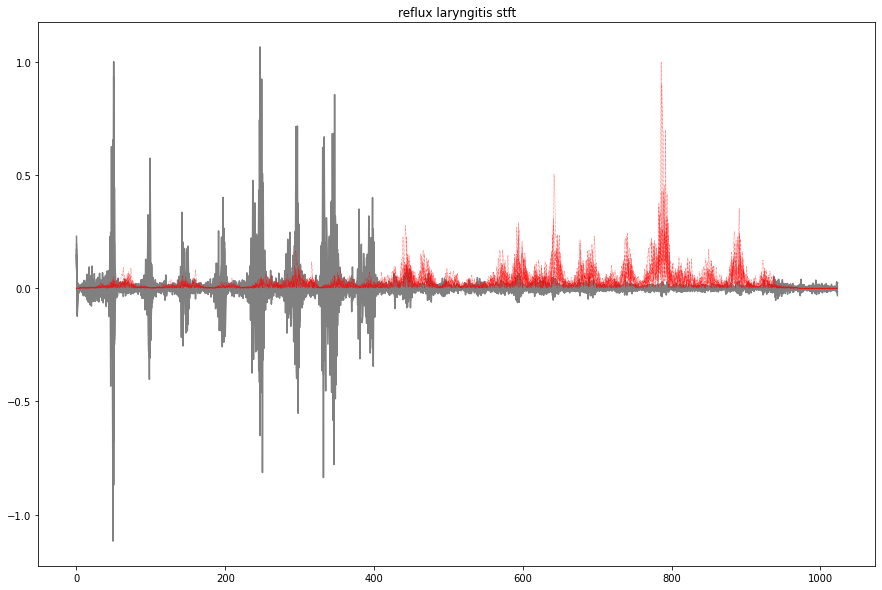

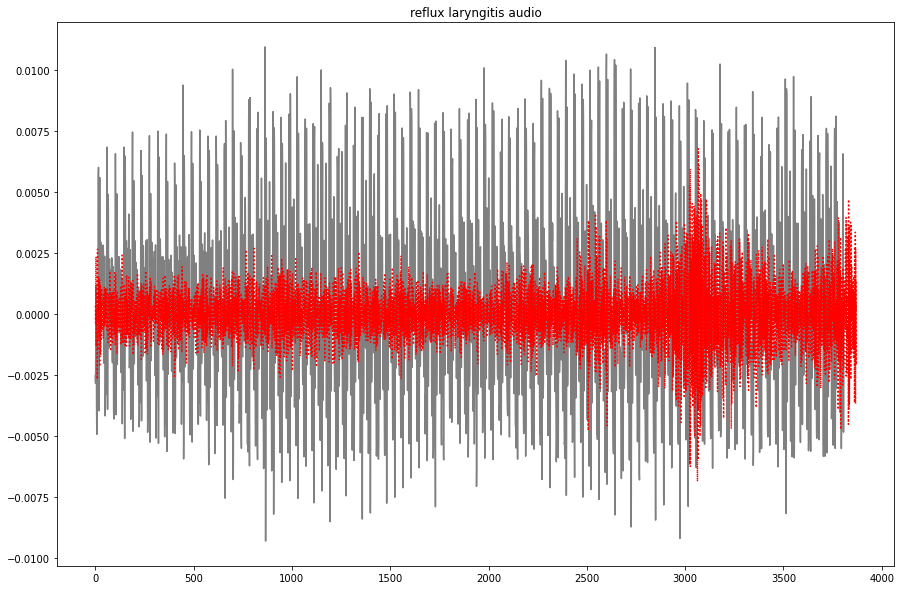

In [515]:
for i in dic.keys():
    plt.figure(figsize=(15,10))
#     plt.plot(np.reshape(X_test[dic[i][1]]/np.max(X_test[dic[i][1]]),(1024,8)),color = 'gray')
    plt.plot(np.reshape(X_test[dic[i][1]]/np.max(X_test[dic[i][1]]),(1024,8)),color = 'gray')
    plt.plot(np.abs(dic[i][0]/np.max(dic[i][0])),color = 'red',ls = 'dotted',linewidth=0.5)
    plt.title(target_names[i]+" stft")
    plt.show()
    plt.figure(figsize=(15,10))
    grad = np.array(dic[i][0]/np.max(dic[i][0]))
    aud = np.reshape(X_test[dic[i][1]]/np.max(X_test[dic[i][1]]),(1024,8))                                        
    plt.plot(librosa.istft(aud,length=3872),color = 'gray')
    plt.plot(librosa.istft(grad,length=3872),color = 'red',ls = 'dotted')
    plt.title(target_names[i]+" audio")
    plt.show()
# plt.show()
# plt.figure(figsize=(20,5))



In [466]:
librosa.istft(dic[i][0])

<tf.Tensor: shape=(1024, 8), dtype=float32, numpy=
array([[-1.7515875e-08, -1.9274914e-08, -4.1080199e-08, ...,
        -1.1631172e-08, -5.3649973e-08, -7.1376157e-08],
       [ 6.0960609e-08,  4.3390802e-10,  1.1033871e-08, ...,
         4.9125752e-08,  5.9017594e-08,  3.9243346e-09],
       [ 3.8242838e-08, -7.1468861e-08, -4.8210424e-08, ...,
         7.9323268e-09, -1.2522406e-07, -1.6887009e-07],
       ...,
       [-4.1119728e-13, -3.1150375e-13,  2.8405324e-13, ...,
        -5.4841044e-13, -2.1875897e-13,  4.9251716e-13],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00]], dtype=float32)>

[[1. 0. 0. 0.]] tf.Tensor([[10.419221  -0.3560611 -5.89595   -3.689533 ]], shape=(1, 4), dtype=float32) tf.Tensor(-2.3436522, shape=(), dtype=float32)


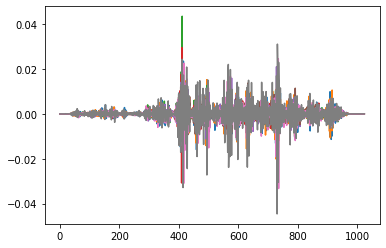

In [591]:
samp =np.reshape(X_test[3],(1,1024,8))
expected_output = np.reshape(y_test[3],(1,4))
                                        
                                        
def my_CE(y_true, y_pred):
    smoothing =0
    log_y_pred = tf.math.log(y_pred+smoothing) 
    element_wise = -tf.math.multiply_no_nan(x=log_y_pred, y=y_true)
    return tf.reduce_mean(tf.reduce_sum(element_wise,axis=1))

with tf.GradientTape() as tape:
    # cast image to float
    inputs = tf.cast(samp,dtype='float32')

    # watch the input pixels
    tape.watch(inputs)

    # generate the predictions
    predictions = new_model(inputs)

    # get the loss
#     print(expected_output, predictions)
#     loss = tf.keras.losses.categorical_crossentropy(
#         expected_output, (predictions)
#     )
    
    loss =my_CE(expected_output,predictions) 
    print(expected_output, predictions,loss)

# get the gradient with respect to the inputs
# K.gradients(K.mean(model.layers[-2].output[0, :], axis=-1), model.layers[-5].layers[-2].output)[0]
gradients = tape.gradient(loss, inputs)
# model.summary()
# gradients
gradients
                                        # get the gradient of the loss with respect to the outputs of the last conv layer

# grads_values = K.mean(gradients, axis=(0,1))

# conv_output_values = np.squeeze(predictions.numpy())
# grads_values = grads_values.numpy()

# # weight the convolution outputs with the computed gradients
# for i in range(512): 
#     conv_output_values[:,,i] *= grads_values[i]
# heatmap = np.mean(conv_output_values, axis=-1)

# heatmap = np.maximum(heatmap, 0)
# heatmap /= heatmap.max()


# import tensorflow.keras.backend as K
# with tf.GradientTape() as tape:
#     inputs = tf.cast(samp,dtype='float32')
#     tape.watch(inputs)
#     y = model(inputs)
# grads = tape.gradient(y, inputs)
# print(grads)
# saliency = tf.abs(grads)
# saliency = saliency / tf.reduce_max(saliency)
# saliency
# new_model.get_config()
grayscale_tensor = gradients#tf.reduce_sum(gradients, axis=0)

normalized_tensor = tf.cast(
    
    (grayscale_tensor - tf.reduce_min(grayscale_tensor))
    / (tf.reduce_max(grayscale_tensor) - tf.reduce_min(grayscale_tensor)),
    tf.uint8,
)

# remove the channel dimension to make the tensor a 2d tensor
# normalized_tensor = tf.squeeze(normalized_tensor)
plt.plot(gradients[0])
plt.show()

In [599]:
samp[0].shape

(1024, 8)

C:\Users\abdul\AppData\Roaming\Python\Python37\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


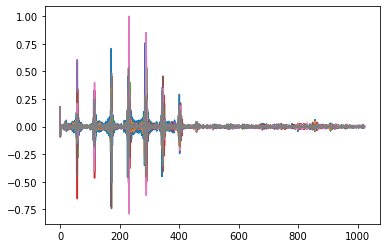

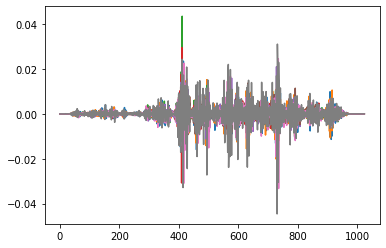

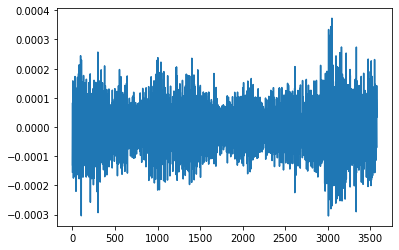

In [601]:
sm = gradients[0]
sx = X_test[3]/np.max(samp[0])
plt.plot(sx)
plt.show()
plt.plot(sm)
plt.show()
plt.plot(librosa.istft(np.array(sm)))
plt.show()

In [603]:
# grayscale_tensor
def threshold_saliency(saliency, threshold):
    thresholded = tf.where(saliency > threshold, tf.ones_like(saliency), tf.zeros_like(saliency))
    return thresholded
bina = threshold_saliency(gradients,np.mean(gradients))

In [618]:
# plt.plot(bina[0])
# plt.show()
# plt.plot(librosa.istft(np.array(bina[0])))
# plt.show()
np.sum(bina[0])
scipy.stats.spearmanr(np.sum(bina[0]), b=5)

SpearmanrResult(correlation=nan, pvalue=nan)

C:\Users\abdul\AppData\Roaming\Python\Python37\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


InvalidArgumentError: slice index 14 of dimension 0 out of bounds. [Op:StridedSlice] name: strided_slice/

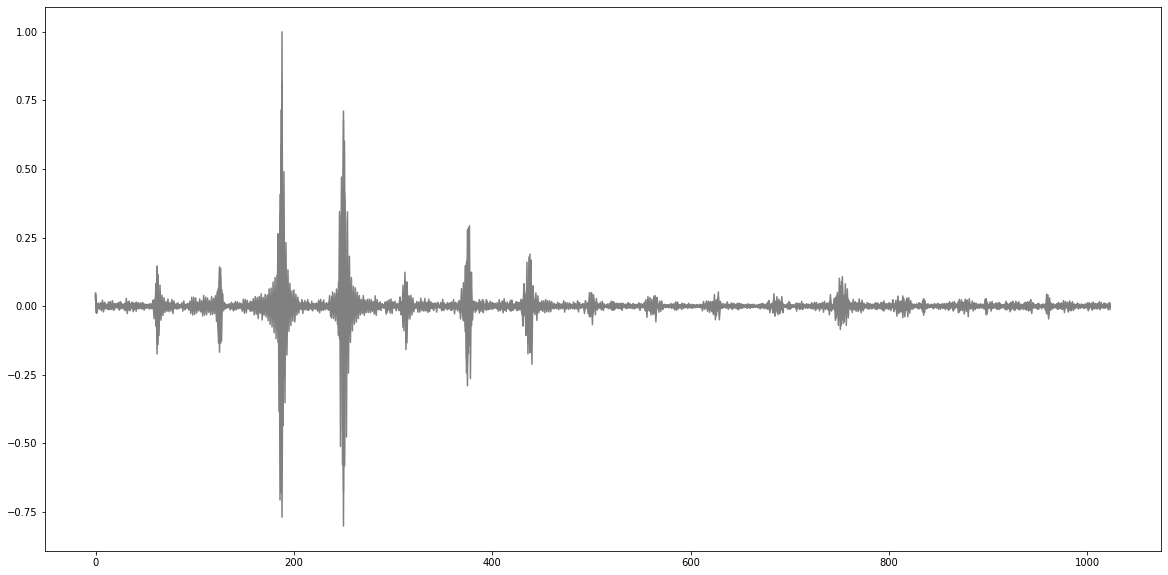

In [542]:
# plt.plot(np.reshape(gradients,(1024,8)))
plt.figure(figsize=(20,10))
plt.plot(np.reshape(X_test[14]/np.max(X_test[14]),(1024,8)),color = 'gray')
plt.plot(gradients[14]/np.max(gradients[14]),color = 'red',ls = 'dotted',linewidth=0.5)
# plt.show()
# plt.figure(figsize=(20,5))

plt.show()
plt.figure(figsize=(20,5))
plt.plot(librosa.istft((np.array(gradients[14]))))
plt.show()
plt.figure(figsize=(20,5))
plt.plot(librosa.istft(np.reshape(X_test[14],(1024,8))))
plt.show()
# print((gradients))
# for i in gradients[0]:
#     print(i)
# len(librosa.istft((np.array(gradients[14]))))

In [85]:
samp

array([[[ 2.2346210e+01+0.0000000e+00j,  2.4588657e+01+0.0000000e+00j,
          2.5718670e+01+0.0000000e+00j, ...,
          2.6451729e+01+0.0000000e+00j,  2.6181452e+01+0.0000000e+00j,
          2.3576210e+01+0.0000000e+00j],
        [-9.0292215e+00-7.8353269e-16j, -1.3485198e+01+2.3009984e+00j,
         -1.3172127e+01-1.1288817e+00j, ...,
         -1.4464193e+01+1.0630814e+00j, -1.3195973e+01-1.3359122e+00j,
         -1.1443406e+01-1.2775497e+00j],
        [-3.6173556e+00-5.3493150e-18j,  1.8570855e+00-9.5738119e-01j,
         -9.8619675e-03+1.0551765e+00j, ...,
          2.0306942e+00-4.4152385e-01j, -5.2197081e-01+1.5441060e-01j,
         -6.9957435e-02+1.1635090e+00j],
        ...,
        [-2.4452021e+00-1.4817371e-16j, -1.1299615e+00-1.9722276e+00j,
         -1.9326295e-01-2.4616036e+00j, ...,
          1.0005809e+00+6.2376663e-02j,  4.8197755e-01+1.1824168e-01j,
          4.8976725e-01-2.4121122e-01j],
        [ 3.9917915e+00-2.2834583e-15j,  2.4558868e-01+2.5981171e+00j,
    